In [1]:
import numpy as np
import theano
import matplotlib.pyplot as plt
import theano.tensor as T
from theano.tensor.nnet import conv
import skimage.data
import matplotlib.cm as cm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\User\Anaconda3\envs\theano-gpu\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
depth = 4
filter_shape = (3, 3)
input = T.tensor4(name='input')
w_shape = (depth, 3, filter_shape[0], filter_shape[1])
dist = np.random.uniform(-0.2, 0.2, size=w_shape)
W = theano.shared(np.asarray(dist, dtype=input.dtype), name='W')
conv_output = conv.conv2d(input, W)
output = T.nnet.sigmoid(conv_output)
f = theano.function([input], output)

C:\Users\User\Anaconda3\envs\theano-gpu\lib\site-packages\theano\tensor\nnet\conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


In [3]:
astronaut = skimage.data.astronaut()
img = np.asarray(astronaut, dtype='float32') / 255
filtered_img = f(img.transpose(2, 0, 1).reshape(1, 3, 512, 512))

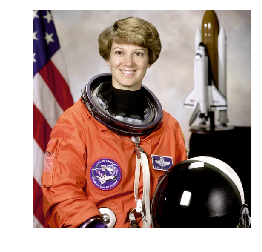

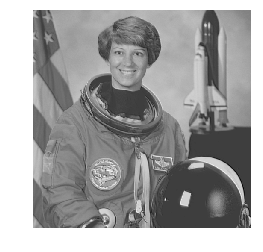

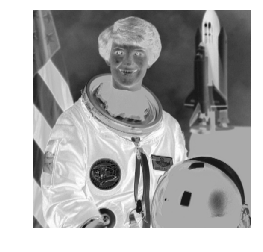

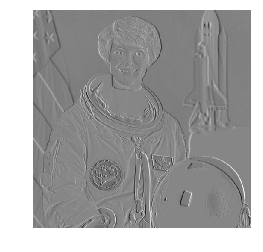

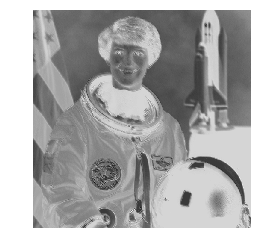

In [4]:
plt.axis('off')
plt.imshow(img)
plt.show()
for img in range(depth):
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(filtered_img[0, img, :, :, ], cmap=cm.gray)
    plt.show()
    #filename = 'astro' + str(img)
    #fig.savefig(filename, bbox_inches='tight')